# Imports

In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

from utils import union_datas, load_parquets, info_sum_isna, add_ses_income, add_ses_points

# Loading the dataset

In [2]:
cols_used = ['NU_INSCRICAO', 'NU_ANO', 'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA',
             'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
             'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
             'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
             'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
             'NU_NOTA_MT', 'NU_NOTA_COMP1',
             'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
             'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
             'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
             'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
             'Q023', 'Q024', 'Q025']

In [3]:
years = [2015, 2016, 2017, 2018, 2019]

In [4]:
df_enem = union_datas(years, cols_used)

In [5]:
df_enem.head()

,NU_INSCRICAO,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ESTADO_CIVIL,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,1.500000e+11,2015.0,Gravataí,RS,42.0,M,1.0,10.0,1.0,1.0,...,B,A,A,B,A,A,B,B,B,B
1,1.500000e+11,2015.0,Montes Claros,MG,21.0,M,1.0,5.0,1.0,0.0,...,A,A,A,B,B,A,D,B,B,B
2,1.500000e+11,2015.0,Olinda,PE,22.0,M,4.0,0.0,1.0,1.0,...,A,A,A,A,A,A,C,B,B,A
3,1.500000e+11,2015.0,Belo Horizonte,MG,23.0,F,1.0,6.0,1.0,0.0,...,B,A,A,C,A,B,D,B,B,B
4,1.500000e+11,2015.0,Teófilo Otoni,MG,18.0,M,1.0,2.0,1.0,0.0,...,A,A,B,B,A,A,C,B,B,B


# Pre-processing

In [6]:
info_sum_isna(df_enem)

,types,missing
NU_INSCRICAO,float64,0
NU_ANO,float64,0
NO_MUNICIPIO_RESIDENCIA,object,0
SG_UF_RESIDENCIA,object,0
NU_IDADE,float64,444
TP_SEXO,object,0
TP_ST_CONCLUSAO,float64,0
TP_ANO_CONCLUIU,float64,0
TP_ESCOLA,float64,0
TP_ESTADO_CIVIL,float64,1193051


In [7]:
df_enem = df_enem.dropna()

In [8]:
info_sum_isna(df_enem)

,types,missing
NU_INSCRICAO,float64,0
NU_ANO,float64,0
NO_MUNICIPIO_RESIDENCIA,object,0
SG_UF_RESIDENCIA,object,0
NU_IDADE,float64,0
TP_SEXO,object,0
TP_ST_CONCLUSAO,float64,0
TP_ANO_CONCLUIU,float64,0
TP_ESCOLA,float64,0
TP_ESTADO_CIVIL,float64,0


# Social Economic Status (SES)

## Income 

- Family income is categorized from A to Q, ranging from 1 to 10 minimum wages.
- To classify we will use the per capita income of the family.

In [9]:
meta = dict(zip(df_enem.columns, df_enem._meta.dtypes))

In [10]:
meta['TP_SES_INCOME'] = 'O'
df_enem['TP_SES_INCOME'] = ''

In [11]:
df_enem = df_enem.apply(lambda x: add_ses_income(x), axis=1, meta=meta)

In [12]:
df_enem.head()

,NU_INSCRICAO,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ESTADO_CIVIL,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,TP_SES_INCOME
0,1.500000e+11,2015.0,Gravataí,RS,42.0,M,1.0,10.0,1.0,1.0,...,A,A,B,A,A,B,B,B,B,E
2,1.500000e+11,2015.0,Olinda,PE,22.0,M,4.0,0.0,1.0,1.0,...,A,A,A,A,A,C,B,B,A,E
4,1.500000e+11,2015.0,Teófilo Otoni,MG,18.0,M,1.0,2.0,1.0,0.0,...,A,B,B,A,A,C,B,B,B,E
5,1.500000e+11,2015.0,Canelinha,SC,19.0,M,1.0,3.0,1.0,0.0,...,A,B,D,A,B,D,B,C,B,E
6,1.500000e+11,2015.0,Guarulhos,SP,17.0,F,2.0,0.0,2.0,0.0,...,A,B,C,B,B,D,B,C,B,D


## Points System


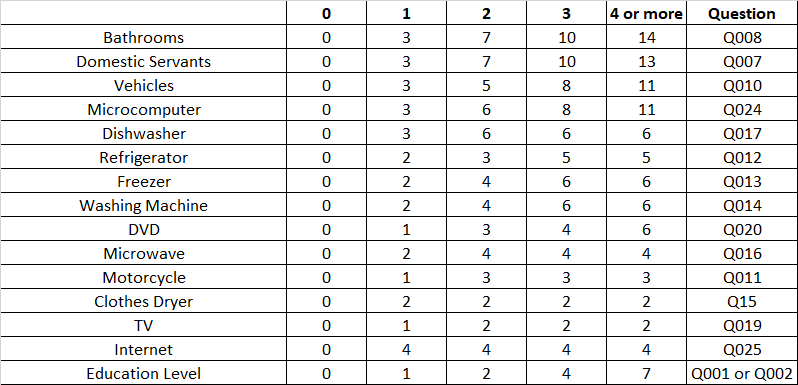


    	Q001 ou Q002
    - 0: Unlettered / Elementary I Incomplete
    - 1: Elementary I Complete / Elementary II Incomplete
    - 2: Elementary II Complete / High School Incomplete
    - 4: High School Complete / University Incomplete
    - 7: University Complete


In [13]:
meta['TP_SES_POINTS'] = 'O'
df_enem['TP_SES_POINTS'] = ''

In [14]:
df_enem = df_enem.apply(lambda x: add_ses_points(x), axis=1, meta=meta)

In [ ]:
df_enem.head()

# Save

In [ ]:
#%%time   --- Wall time: 2h 25min 15s

#df_enem.to_parquet('../datasets/integrated_datas.parquet.gzip', engine='fastparquet', compression='gzip', write_index=False)

# Load parquet files

In [ ]:
# First part
path = '../datasets/integrated_datas.parquet.gzip/part.0.parquet'

df_enem_parquet = load_parquets(path, 340)

In [ ]:
df_enem_parquet.head(5)

In [ ]:
df_parquet = dd.read_parquet('../datasets/integrated_datas.parquet.gzip', ignore_metadata_file=True, columns=cols_used)

In [ ]:
df_parquet['NU_ANO'].value_counts(ascending=False).compute()